In [1]:
#CPU版本
import os
import torch
import numpy as np
from sklearn.cluster import KMeans #CPU版本
import matplotlib.pyplot as plt
import cv2

num_colors = 6  # 指定顏色數量

# 顯示圖片在 jupyter notebook 中 show_img_jupyter
def show_img_jupyter(img):
    image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.show()
    
# 定義函式用於判斷顏色類別
def get_color_category(color):
    r, g, b = color

    # 設定閥值範圍
    gray_threshold = 30
    cool_threshold = 60
    warm_threshold = 60
  
    # 判斷顏色類別
    if r == g == b:
        print(f"gray") 
        return 'gray'
    elif (r - b < cool_threshold and g - b < cool_threshold) and g > r:
        print(f"cool") 
        return 'cool'
    elif r - b > warm_threshold and g - b > 50:
        print(f"warm") 
        return 'warm'
    else:
        print(f"unknown") 
        return 'unknown'
# 判断图片是否为灰度图  
def checkGray(chip):
    chip_gray = cv2.cvtColor(chip,cv2.COLOR_BGR2GRAY)
    r,g,b = cv2.split(chip)
    r = r.astype(np.float32)
    g = g.astype(np.float32)
    b = b.astype(np.float32)
    s_w, s_h = r.shape[:2]
    x = (r+b+g)/3
    # x = chip_gray
    r_gray = abs(r-x)
    g_gray = abs(g-x)
    b_gray=  abs(b-x)
    r_sum = np.sum(r_gray)/(s_w * s_h)
    g_sum = np.sum(g_gray)/(s_w * s_h)
    b_sum = np.sum(b_gray)/(s_w * s_h)
    gray_degree = (r_sum+g_sum+b_sum)/3
    if gray_degree <10:
        print("Gray")
        return 1
    else:
        print ("NOT Gray")
        return 2

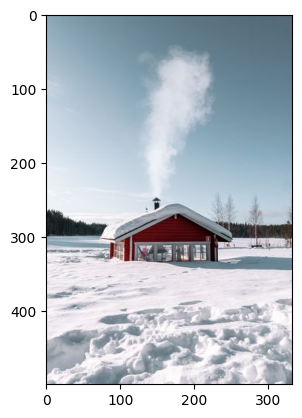

Gray


In [6]:

# 讀取單張照片
image_path ='D:/Xampp/htdocs/app/images/1002.jpg'  # 替換為實際的照片路徑

# 讀取圖片
image = cv2.imread(image_path)

show_img_jupyter(image)

# 设置目标图像尺寸
target_width = 500  # 替换为你想要的宽度
target_height = int(image.shape[0] * (target_width / image.shape[1]))

# 降采样/调整图像尺寸
resized_image = cv2.resize(image, (target_width, target_height))

# 判断图片是否为灰度图
if checkGray(resized_image ) == 1:
    # 灰度图像，直接分类为灰度
    color_category = 'gray'
else:
    # 將圖片轉換為RGB色彩空間
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # 將圖片轉換為一維數組
    pixels = image_rgb.reshape(-1, 3)
    # 執行K-Means算法
    kmeans = KMeans(n_clusters=num_colors)
    kmeans.fit(pixels)
    # 取得每個像素的標籤
    labels = kmeans.labels_
    # 取得每個顏色的RGB值
    colors = kmeans.cluster_centers_
    # 計算每個色系的像素數量
    counts = np.bincount(labels)
    # 排序顏色和像素數量
    sorted_colors = colors[np.argsort(counts)][::-1]
    sorted_counts = np.sort(counts)[::-1]
    # 計算冷色調和暖色調的比例加總
    cool_sum = 0
    warm_sum = 0
    for i in range(num_colors):
        color = sorted_colors[i]
        category = get_color_category(color)
        if category == 'cool':
            cool_sum += sorted_counts[i]
        elif category == 'warm':
            warm_sum += sorted_counts[i]
        
        
    # 計算冷色調和暖色調的比例
    total_sum = cool_sum + warm_sum
    if total_sum == 0 :
        main_color = 'gray'
    else:
        cool_ratio = cool_sum / total_sum
        warm_ratio = warm_sum / total_sum
        # 判斷最高比例的色調類別
        if cool_ratio > warm_ratio:
            main_color = 'cool'
            main_ratio = cool_ratio
        else:
            main_color = 'warm'
            main_ratio = warm_ratio
    # 印出結果
    print(f"圖片名稱：{image_path}")
    print(f"冷色調比例：{cool_ratio * 100:.2f}%")
    print(f"暖色調比例：{warm_ratio * 100:.2f}%")
    print(f"主要色調：{main_color}")
    print(f"主要色調比例：{main_ratio * 100:.2f}%")
    # 繪製圓餅圖
    labels = ['Cool', 'Warm', 'Gray']
    ratios = [cool_ratio, warm_ratio, 1 - cool_ratio - warm_ratio]
    colors = ['#66b3ff', '#ff9999', '#999999']
    plt.pie(ratios, labels=labels, colors=colors, autopct='%1.1f%%')
    plt.title('Color Composition')
    plt.axis('equal')
    plt.show()
